In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories 
and their best-seller status.

In [77]:
df = pd.read_csv("/Users/adrianabrazon/Documents/IronHack/Lessons/week_4/amz_uk_price_prediction_dataset.csv")

In [78]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [79]:
df['isBestSeller']

0          False
1           True
2          False
3          False
4          False
           ...  
2443646    False
2443647    False
2443648    False
2443649    False
2443650    False
Name: isBestSeller, Length: 2443651, dtype: bool

1. Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the 
categories based on this proportion in descending order. 

In [80]:
crosstab = pd.crosstab(df['category'], df['isBestSeller']) #new DF 
crosstab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [81]:
print('Categories with True:\n' , crosstab[True])
print('\nCategories with False:\n',crosstab[False])

Categories with True:
 category
3D Printers                         1
3D Printing & Scanning              2
Abrasive & Finishing Products       5
Action Cameras                      1
Adapters                            3
                                 ... 
Wind Instruments                    7
Window Treatments                   5
Women                             213
Women's Sports & Outdoor Shoes     20
eBook Readers & Accessories         0
Name: True, Length: 296, dtype: int64

Categories with False:
 category
3D Printers                         247
3D Printing & Scanning             4065
Abrasive & Finishing Products       245
Action Cameras                     1696
Adapters                            251
                                  ...  
Wind Instruments                    243
Window Treatments                   234
Women                             17559
Women's Sports & Outdoor Shoes     1939
eBook Readers & Accessories         246
Name: False, Length: 296, dtype: int64

In [82]:
crosstab['best_s_p']= crosstab[True]/(crosstab[True]+crosstab[False])
crosstab

isBestSeller,False,True,best_s_p
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


In [83]:
print('\nAre there categories where being a best-seller is more prevalent?') 
print('Grocery, Smart Home Security & Lighting, Health & Personal Care')


Are there categories where being a best-seller is more prevalent?
Grocery, Smart Home Security & Lighting, Health & Personal Care


2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [176]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value 

print(chi2_p_value)

print('chi2_p_value=0 , it indicates that the best-seller distribution is completely independent of the product category.')

0.0
chi2_p_value=0 , it indicates that the best-seller distribution is completely independent of the product category.


In [173]:
crosstab.sort_values('best_s_p', ascending=False)

isBestSeller,False,True,best_s_p
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


Compute Cramér's V to understand the strength of association between best-seller status and category.

Computing the association between variables in 'crosstab_result' using the "cramer" method

In [172]:
from scipy.stats.contingency import association

association(crosstab, method="cramer") # 0.12 indicates a weak associastion between the two variables

ValueError: `observed` must be an integer array.

3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

Plotting a stacked bar chart for the 'crosstab' data

<Axes: xlabel='category'>

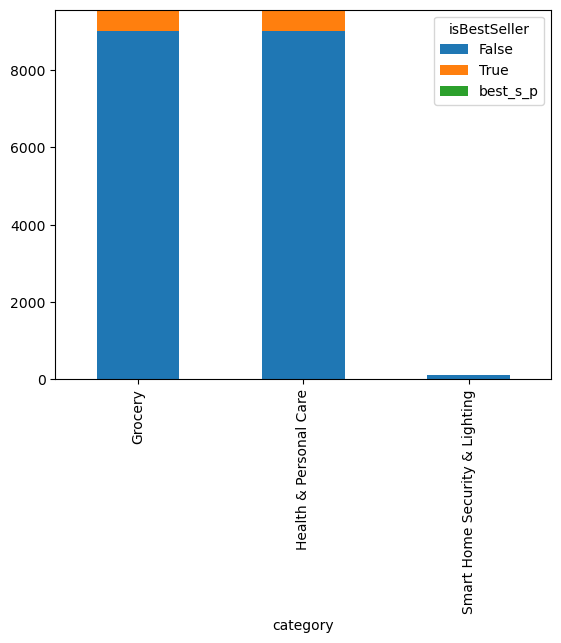

In [92]:
crosstab

crosstab1=crosstab[crosstab['best_s_p']>0.05]
crosstab1

crosstab1.plot(kind="bar", stacked=True)

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first
quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers 
and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis 
    for a hint on how to do this.

In [93]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [189]:
data_series = df['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)

pandas.core.series.Series

In [164]:
df1=df[~df['price'].isin(outliers)] #filter out outliers series from dataframe
df1

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

In [165]:
filter_top20=df1['category'].value_counts().sort_values(ascending=False).head(20)
filter_top20 

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

In [168]:
df1_top20 = df1[df1['category'].map(df1['category'].value_counts())>= 15050]
df1_top20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


<Axes: xlabel='price', ylabel='category'>

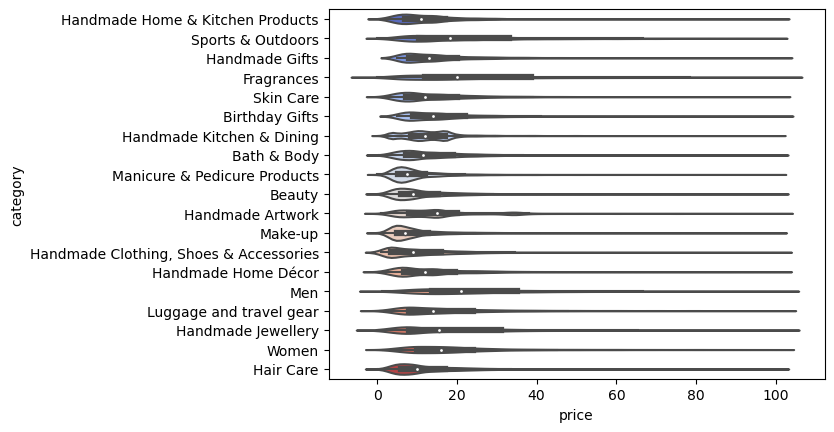

In [169]:
sns.violinplot(data=df1_top20, x='price', y='category', palette="coolwarm")

Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [196]:
top10_filter=df1['category'].value_counts().head(10)
top10_filter

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Name: count, dtype: int64

In [230]:
df1_top10=df1[df1['category'].map(df1['category'].value_counts()) >= 17948] # df for top 10 products

In [237]:
df1_top10['avg_price'] = df1_top10.groupby('category')['price'].transform('mean')
df1_top10

/var/folders/84/gcp9xbms2mj2xtqtdk7w5ckr0000gn/T/ipykernel_80701/4007352536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_top10['avg_price'] = df1_top10.groupby('category')['price'].transform('mean')


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,avg_price
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors,25.172065
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors,25.172065
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors,25.172065
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors,25.172065
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors,25.172065
...,...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors,25.172065
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors,25.172065
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors,25.172065
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors,25.172065


In [247]:
highest_avg = (df.groupby(['category'])['price'].mean()).round(2).sort_values(ascending=False).head()
print(highest_avg)
print('\nWhich product category commands the highest average price? Laptops')

category
Laptops                  1087.99
3D Printers              1018.04
Desktop PCs               926.82
Home Office Furniture     622.14
Test & Measurement        559.38
Name: price, dtype: float64

Which product category commands the highest average price? Laptops


<Axes: xlabel='avg_price', ylabel='category'>

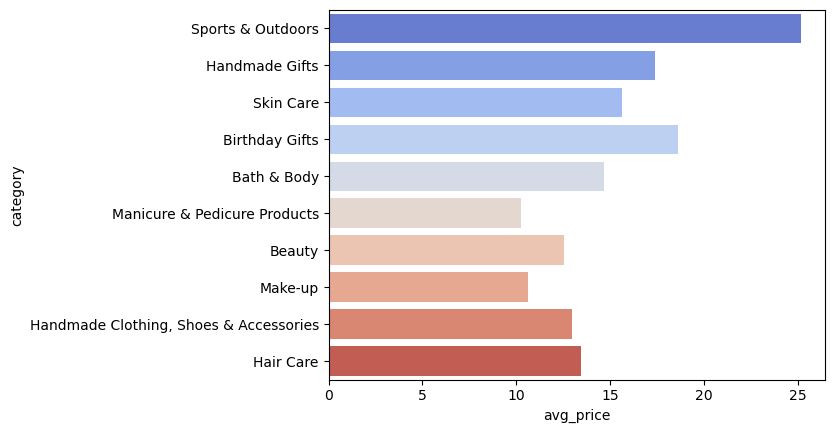

In [233]:
sns.barplot(data=df1_top10, x='avg_price', y='category', palette="coolwarm")

Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

<Axes: xlabel='stars', ylabel='category'>

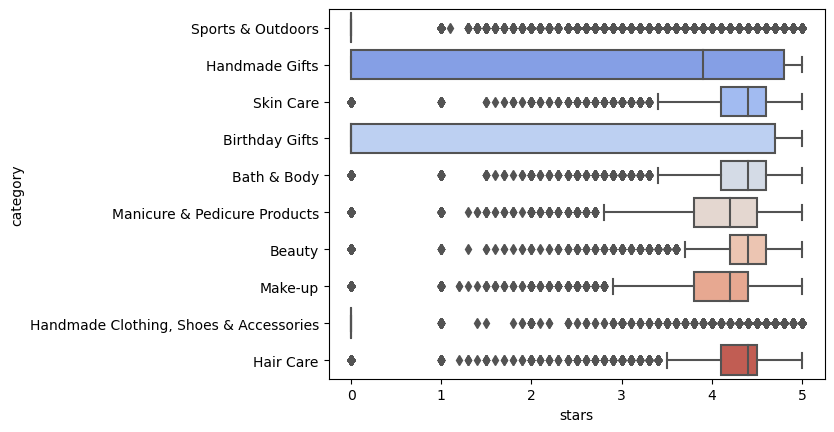

In [249]:
sns.boxplot(data=df1_top10, x='stars', y='category', palette="coolwarm")

In [246]:
highest_med_stars = (df.groupby(['category'])['stars'].median()).round(2).sort_values(ascending=False).head()
print(highest_med_stars)
print('\nWhich category tends to receive the highest median rating from customers? Computer Memory')

category
Computer Memory         4.7
Hobbies                 4.6
Beer, Wine & Spirits    4.6
Laptop Accessories      4.6
Kids' Play Figures      4.6
Name: stars, dtype: float64

Which category tends to receive the highest median rating from customers? Computer Memory


Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

1. Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [270]:
# Pearson
correlation_p = df1['price'].corr(df1['stars'])
print('Pearson correlation:', correlation)

Pearson correlation: -0.06679697280768393


In [273]:
# Spearman
correlation_sp = df1['price'].corr(df1['stars'], method='spearman')
print('Spearman correlation:', correlation)

Spearman correlation: -0.06679697280768393


Both correlations imply little to no linear/monotonic correlation given that both values are closer to zero

2. Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='stars', ylabel='price'>

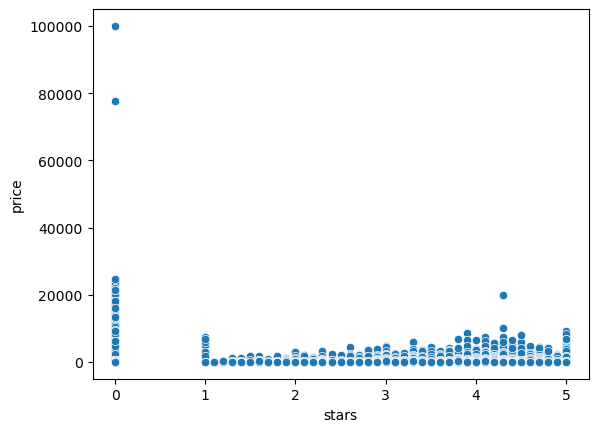

In [261]:
sns.scatterplot(data=df, x='stars', y='price')

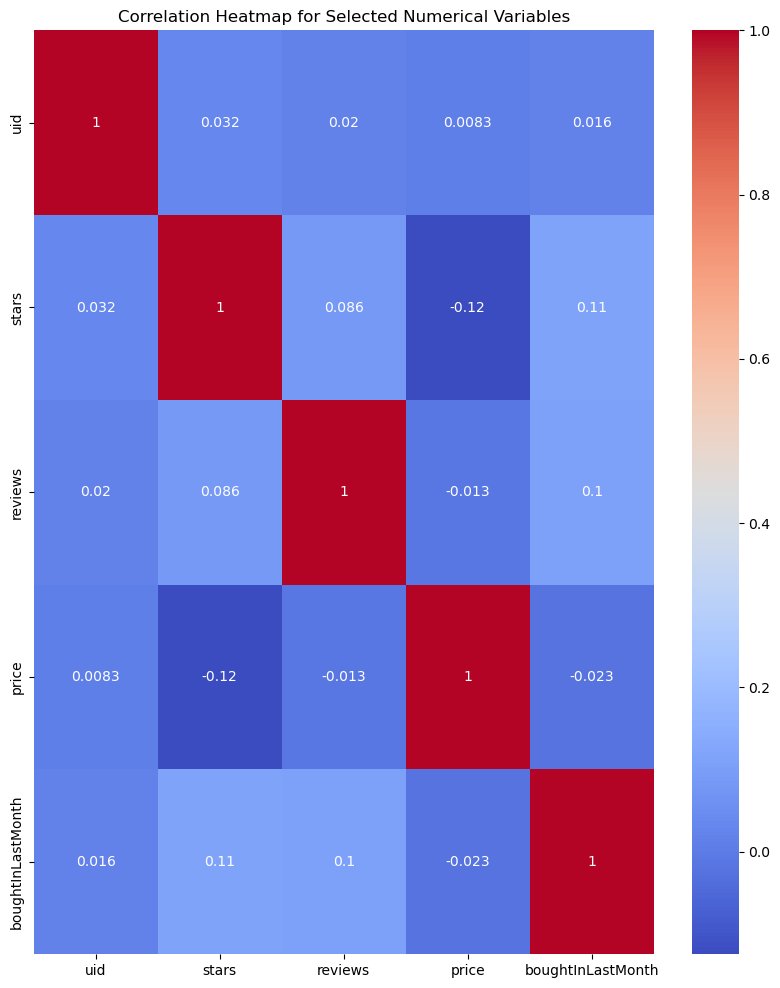

In [266]:
# for all numerical variables

potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 12))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

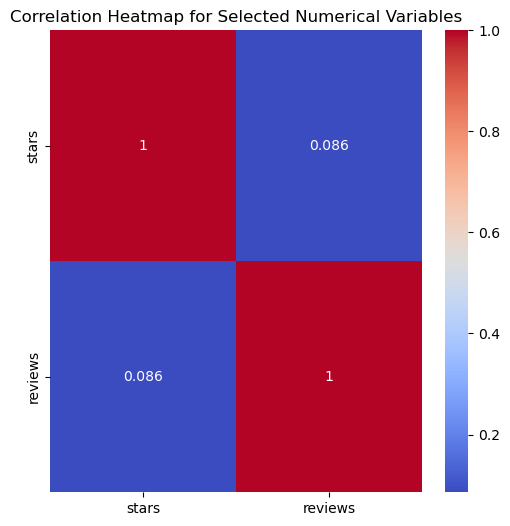

In [276]:
## testing

correlation_s = df_numerical.corrwith(df['stars'], method='spearman')

correlation_s_sorted = correlation_s.sort_values(ascending=False)

correlation_s_sorted_top = correlation_s_sorted[abs(correlation_s_sorted) >= 0.5]
correlation_s_sorted_top

correlation_matrix = df_numerical[correlation_s_sorted_top.index].corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

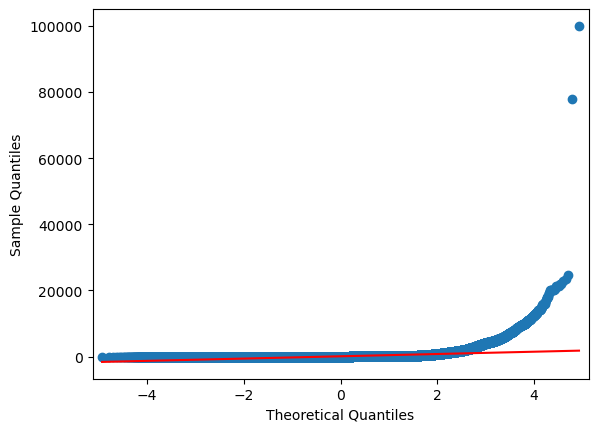

In [277]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df['price'], line='s');

Upper Tail: In the upper tail (right side of the plot), the data points deviate significantly from the red line, suggesting a long tail or skewness to the right. This indicates that there are more extreme high values in 'price' than would be expected in a normal distribution.

Central Portion: The central portion of the data points doesn't align perfectly with the line, suggesting possible deviations from normality in the main body of the distribution as well.